In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

dataset = loadmat('face_emotion_data.mat')

X, y = dataset['X'], dataset['y']
n, p = np.shape(X)

y[y==-1] = 0  # use 0/1 for labels instead of -1/+1
X = np.hstack((np.ones((n,1)), X))  # append a column of ones

training accuracy of 1.0 first occurs at epoch # 17


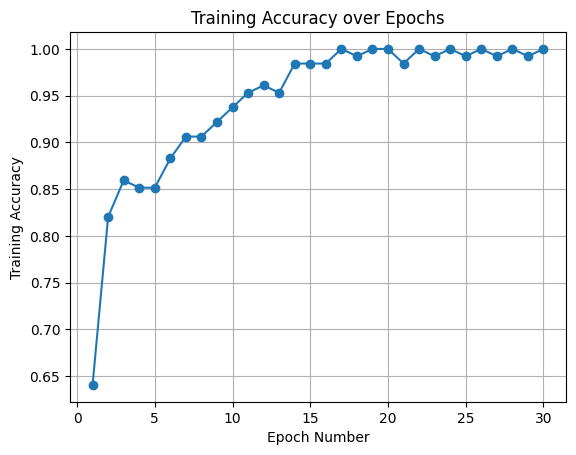

In [2]:
# Problem 4a - Devin Bresser

# define the model as follows:
# takes in a vector x E R^10
# one hidden layer with 32 neurons
# outputs a scalar y_hat E R

model = Sequential([
    Dense(32, activation='sigmoid', input_shape=(10,)), # hidden layer 32 neurons
    Dense(1, activation='sigmoid') # output layer
])

# compile the model with squared error loss function and SGD optimizer with learning rate 0.05
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.05), loss='mean_squared_error', metrics=['accuracy'])

# Problem 4b - training accuracy

# try with 30 epochs
max_epochs = 30
train_accuracies = []

for i in range(0, max_epochs):
    
    fit = model.fit(X, y, epochs=1, batch_size=1, verbose=0)

    # obtain the accuracy for this epoch
    train_accuracy = fit.history['accuracy'][0]
    train_accuracies.append(train_accuracy)

    #print(f"Completed Epochs: {i}, Accuracy: {train_accuracy:.4f}")

first_perfect_accuracy = next((i, acc) for i, acc in enumerate(train_accuracies, start=1) if acc == 1)

print(f"training accuracy of 1.0 first occurs at epoch # {first_perfect_accuracy[0]}")

# plotting: 
epochs = list(range(1,max_epochs+1))

plt.plot(epochs, train_accuracies, marker='o', linestyle='-')
plt.title('Training Accuracy over Epochs')
plt.xlabel('Epoch Number')
plt.ylabel('Training Accuracy')
plt.grid(True)
plt.show()

In [17]:
# Problem 4c - CV
# This code essentially runs the cross validation process with a number of epochs
# ranging from 1 to 100. We should see a convergence after a certain point,
# and from there be able to tell if it's possible to attain perfect test accuracy.

from sklearn.model_selection import KFold

max_epochs = 100
epoch_accuracies = []

# for each number of epochs, do the CV
for i in range(1, max_epochs):
    kf = KFold(n_splits=8, shuffle=True, random_state=42)
    fold_accuracies = []

    # do CV using KFold module
    for train_index, test_index in kf.split(X):
        
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # re-define the model each time
        model = Sequential([
            Dense(32, activation='sigmoid', input_shape=(10,)),
            Dense(1, activation='sigmoid')
        ])
        model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.05), 
                      loss='mean_squared_error', 
                      metrics=['accuracy'])

        # fit the model to the training part
        model.fit(X_train, y_train, epochs=i, batch_size=1, verbose=0) # picked 20 epochs based on training results
    
        # get the accuracy on the testing part and append to fold_accuracies
        _, accuracy = model.evaluate(X_test, y_test, verbose=0)
        fold_accuracies.append(accuracy)
    
    # compute the average accuracy across all folds
    average_accuracy = np.mean(fold_accuracies)
    
    # store average test accuracy for that epoch count
    print(f"average test accuracy at epoch {i}: {average_accuracy}")
    epoch_accuracies.append(average_accuracy)

average test accuracy at epoch 1: 0.7578125
average test accuracy at epoch 2: 0.8046875
average test accuracy at epoch 3: 0.8515625
average test accuracy at epoch 4: 0.84375
average test accuracy at epoch 5: 0.8828125
average test accuracy at epoch 6: 0.8828125
average test accuracy at epoch 7: 0.8984375
average test accuracy at epoch 8: 0.8828125
average test accuracy at epoch 9: 0.9140625
average test accuracy at epoch 10: 0.9375
average test accuracy at epoch 11: 0.9296875
average test accuracy at epoch 12: 0.9375
average test accuracy at epoch 13: 0.9296875
average test accuracy at epoch 14: 0.9375
average test accuracy at epoch 15: 0.9453125
average test accuracy at epoch 16: 0.953125
average test accuracy at epoch 17: 0.96875
average test accuracy at epoch 18: 0.9765625
average test accuracy at epoch 19: 0.9765625
average test accuracy at epoch 20: 0.9765625
average test accuracy at epoch 21: 0.9609375
average test accuracy at epoch 22: 0.9609375
average test accuracy at epoch 23